In [ ]:
"""
************************************************************************************************
************************************************************************************************

The purpose of this notebook is to create a pandas Dataframe to reproduce the results Of
Data-driven prediction of battery cycle life before capacity degradation. Severson, et al.  

This notebook is adapted from 
https://github.com/rdbraatz/data-driven-prediction-of-battery-cycle-life-before-capacity-degradation 
And
https://github.com/rochan17/Battery-Life-Prediction

The final Pandas dataframe 'final_dataset.csv' Is Summary data for First 100 cycles 
Of each of the 124 battery cells And is to be used In follow-up notebook

************************************************************************************************
************************************************************************************************
"""

In [1]:
import h5py
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import pickle
import pandas as pd
from scipy.stats import skew,kurtosis

In [2]:
########################################
# Original data
# from https://data.matr.io/1/projects/5c48dd2bc625d700019f3204
########################################

matFilename1 = '2017-05-12_batchdata_updated_struct_errorcorrect.mat'
matFilename2 = '2017-06-30_batchdata_updated_struct_errorcorrect.mat'
matFilename3 = '2018-04-12_batchdata_updated_struct_errorcorrect.mat'

In [3]:
f = h5py.File(matFilename1)
batch=f['batch']
num_cells = batch['summary'].shape[0]
bat_dict = {}
for i in range(num_cells):
    cl = f[batch['cycle_life'][i,0]][()]
    policy = f[batch['policy_readable'][i,0]][()].tobytes()[::2].decode()
    summary_IR = np.hstack(f[batch['summary'][i,0]]['IR'][0,:].tolist())
    summary_QC = np.hstack(f[batch['summary'][i,0]]['QCharge'][0,:].tolist())
    summary_QD = np.hstack(f[batch['summary'][i,0]]['QDischarge'][0,:].tolist())
    summary_TA = np.hstack(f[batch['summary'][i,0]]['Tavg'][0,:].tolist())
    summary_TM = np.hstack(f[batch['summary'][i,0]]['Tmin'][0,:].tolist())
    summary_TX = np.hstack(f[batch['summary'][i,0]]['Tmax'][0,:].tolist())
    summary_CT = np.hstack(f[batch['summary'][i,0]]['chargetime'][0,:].tolist())
    summary_CY = np.hstack(f[batch['summary'][i,0]]['cycle'][0,:].tolist())
    summary = {'IR': summary_IR, 'QC': summary_QC, 'QD': summary_QD, 'Tavg':
                summary_TA, 'Tmin': summary_TM, 'Tmax': summary_TX, 'chargetime': summary_CT,
                'cycle': summary_CY}
    cycles = f[batch['cycles'][i,0]]
    cycle_dict = {}
    for j in range(cycles['I'].shape[0]):
        I = np.hstack((f[cycles['I'][j,0]][()]))
        Qc = np.hstack((f[cycles['Qc'][j,0]][()]))
        Qd = np.hstack((f[cycles['Qd'][j,0]][()]))
        Qdlin = np.hstack((f[cycles['Qdlin'][j,0]][()]))
        T = np.hstack((f[cycles['T'][j,0]][()]))
        Tdlin = np.hstack((f[cycles['Tdlin'][j,0]][()]))
        V = np.hstack((f[cycles['V'][j,0]][()]))
        dQdV = np.hstack((f[cycles['discharge_dQdV'][j,0]][()]))
        t = np.hstack((f[cycles['t'][j,0]][()]))
        cd = {'I': I, 'Qc': Qc, 'Qd': Qd, 'Qdlin': Qdlin, 'T': T, 'Tdlin': Tdlin, 'V':V, 'dQdV': dQdV, 't':t}
        cycle_dict[str(j)] = cd
        
    cell_dict = {'cycle_life': cl, 'charge_policy':policy, 'summary': summary, 'cycles': cycle_dict}
    key = 'b1c' + str(i)
    bat_dict[key]=   cell_dict
    
batch_dict1 = bat_dict

#Batch2

In [4]:
f = h5py.File(matFilename2)
batch=f['batch']
num_cells = batch['summary'].shape[0]
bat_dict = {}
for i in range(num_cells):
    cl = f[batch['cycle_life'][i,0]][()]
    policy = f[batch['policy_readable'][i,0]][()].tobytes()[::2].decode()
    summary_IR = np.hstack(f[batch['summary'][i,0]]['IR'][0,:].tolist())
    summary_QC = np.hstack(f[batch['summary'][i,0]]['QCharge'][0,:].tolist())
    summary_QD = np.hstack(f[batch['summary'][i,0]]['QDischarge'][0,:].tolist())
    summary_TA = np.hstack(f[batch['summary'][i,0]]['Tavg'][0,:].tolist())
    summary_TM = np.hstack(f[batch['summary'][i,0]]['Tmin'][0,:].tolist())
    summary_TX = np.hstack(f[batch['summary'][i,0]]['Tmax'][0,:].tolist())
    summary_CT = np.hstack(f[batch['summary'][i,0]]['chargetime'][0,:].tolist())
    summary_CY = np.hstack(f[batch['summary'][i,0]]['cycle'][0,:].tolist())
    summary = {'IR': summary_IR, 'QC': summary_QC, 'QD': summary_QD, 'Tavg':
                summary_TA, 'Tmin': summary_TM, 'Tmax': summary_TX, 'chargetime': summary_CT,
                'cycle': summary_CY}
    cycles = f[batch['cycles'][i,0]]
    cycle_dict = {}
    for j in range(cycles['I'].shape[0]):
        I = np.hstack((f[cycles['I'][j,0]][()]))
        Qc = np.hstack((f[cycles['Qc'][j,0]][()]))
        Qd = np.hstack((f[cycles['Qd'][j,0]][()]))
        Qdlin = np.hstack((f[cycles['Qdlin'][j,0]][()]))
        T = np.hstack((f[cycles['T'][j,0]][()]))
        Tdlin = np.hstack((f[cycles['Tdlin'][j,0]][()]))
        V = np.hstack((f[cycles['V'][j,0]][()]))
        dQdV = np.hstack((f[cycles['discharge_dQdV'][j,0]][()]))
        t = np.hstack((f[cycles['t'][j,0]][()]))
        cd = {'I': I, 'Qc': Qc, 'Qd': Qd, 'Qdlin': Qdlin, 'T': T, 'Tdlin': Tdlin, 'V':V, 'dQdV': dQdV, 't':t}
        cycle_dict[str(j)] = cd
        
    cell_dict = {'cycle_life': cl, 'charge_policy':policy, 'summary': summary, 'cycles': cycle_dict}
    key = 'b2c' + str(i)
    bat_dict[key]=   cell_dict
    
batch_dict2 = bat_dict

Batch 3

In [5]:
f = h5py.File(matFilename3)
batch=f['batch']
num_cells = batch['summary'].shape[0]
x=range(num_cells)
bat_dict = {}
for i in x:
    cl = f[batch['cycle_life'][i,0]][()]
    policy = f[batch['policy_readable'][i,0]][()].tobytes()[::2].decode()
    summary_IR = np.hstack(f[batch['summary'][i,0]]['IR'][0,:].tolist())
    summary_QC = np.hstack(f[batch['summary'][i,0]]['QCharge'][0,:].tolist())
    summary_QD = np.hstack(f[batch['summary'][i,0]]['QDischarge'][0,:].tolist())
    summary_TA = np.hstack(f[batch['summary'][i,0]]['Tavg'][0,:].tolist())
    summary_TM = np.hstack(f[batch['summary'][i,0]]['Tmin'][0,:].tolist())
    summary_TX = np.hstack(f[batch['summary'][i,0]]['Tmax'][0,:].tolist())
    summary_CT = np.hstack(f[batch['summary'][i,0]]['chargetime'][0,:].tolist())
    summary_CY = np.hstack(f[batch['summary'][i,0]]['cycle'][0,:].tolist())
    summary = {'IR': summary_IR, 'QC': summary_QC, 'QD': summary_QD, 'Tavg':
                summary_TA, 'Tmin': summary_TM, 'Tmax': summary_TX, 'chargetime': summary_CT,
                'cycle': summary_CY}
    cycles = f[batch['cycles'][i,0]]
    cycle_dict = {}
    for j in range(cycles['I'].shape[0]):
        I = np.hstack((f[cycles['I'][j,0]][()]))
        Qc = np.hstack((f[cycles['Qc'][j,0]][()]))
        Qd = np.hstack((f[cycles['Qd'][j,0]][()]))
        Qdlin = np.hstack((f[cycles['Qdlin'][j,0]][()]))
        T = np.hstack((f[cycles['T'][j,0]][()]))
        Tdlin = np.hstack((f[cycles['Tdlin'][j,0]][()]))
        V = np.hstack((f[cycles['V'][j,0]][()]))
        dQdV = np.hstack((f[cycles['discharge_dQdV'][j,0]][()]))
        t = np.hstack((f[cycles['t'][j,0]][()]))
        cd = {'I': I, 'Qc': Qc, 'Qd': Qd, 'Qdlin': Qdlin, 'T': T, 'Tdlin': Tdlin, 'V':V, 'dQdV': dQdV, 't':t}
        cycle_dict[str(j)] = cd
        
    cell_dict = {'cycle_life': cl, 'charge_policy':policy, 'summary': summary, 'cycles': cycle_dict}
    key = 'b3c' + str(i)
    bat_dict[key]=   cell_dict
    
batch_dict3 = bat_dict

In [6]:
# Dictionary copies, to preserve batch_dict1,batch_dict2,batch_dict3
# And prevent having to rerun above code, In case of errors
batch1 = batch_dict1.copy()
batch2 = batch_dict2.copy()
batch3 = batch_dict3.copy()

In [7]:
del batch1['b1c8']
del batch1['b1c10']
del batch1['b1c12']
del batch1['b1c13']
del batch1['b1c22']

numBat1 = len(batch1.keys())

batch2_keys = ['b2c7', 'b2c8', 'b2c9', 'b2c15', 'b2c16']
batch1_keys = ['b1c0', 'b1c1', 'b1c2', 'b1c3', 'b1c4']
add_len = [662, 981, 1060, 208, 482]
for i, bk in enumerate(batch1_keys):
    batch1[bk]['cycle_life'] = batch1[bk]['cycle_life'] + add_len[i]
    for j in batch1[bk]['summary'].keys():
        if j == 'cycle':
            batch1[bk]['summary'][j] = np.hstack((batch1[bk]['summary'][j], batch2[batch2_keys[i]]['summary'][j] + len(batch1[bk]['summary'][j])))
        else:
            batch1[bk]['summary'][j] = np.hstack((batch1[bk]['summary'][j], batch2[batch2_keys[i]]['summary'][j]))
    last_cycle = len(batch1[bk]['cycles'].keys())
    for j, jk in enumerate(batch2[batch2_keys[i]]['cycles'].keys()):
        batch1[bk]['cycles'][str(last_cycle + j)] = batch2[batch2_keys[i]]['cycles'][jk]
        
del batch2['b2c7']
del batch2['b2c8']
del batch2['b2c9']
del batch2['b2c15']
del batch2['b2c16']

del batch3['b3c37']
del batch3['b3c2']
del batch3['b3c23']
del batch3['b3c32']
del batch3['b3c38']
del batch3['b3c39']

numBat2 = len(batch2.keys())
numBat3 = len(batch3.keys())
numBat = numBat1 + numBat2 + numBat3

bat_dict = {**batch1, **batch2, **batch3}
bat_dict.keys()

dict_keys(['b1c0', 'b1c1', 'b1c2', 'b1c3', 'b1c4', 'b1c5', 'b1c6', 'b1c7', 'b1c9', 'b1c11', 'b1c14', 'b1c15', 'b1c16', 'b1c17', 'b1c18', 'b1c19', 'b1c20', 'b1c21', 'b1c23', 'b1c24', 'b1c25', 'b1c26', 'b1c27', 'b1c28', 'b1c29', 'b1c30', 'b1c31', 'b1c32', 'b1c33', 'b1c34', 'b1c35', 'b1c36', 'b1c37', 'b1c38', 'b1c39', 'b1c40', 'b1c41', 'b1c42', 'b1c43', 'b1c44', 'b1c45', 'b2c0', 'b2c1', 'b2c2', 'b2c3', 'b2c4', 'b2c5', 'b2c6', 'b2c10', 'b2c11', 'b2c12', 'b2c13', 'b2c14', 'b2c17', 'b2c18', 'b2c19', 'b2c20', 'b2c21', 'b2c22', 'b2c23', 'b2c24', 'b2c25', 'b2c26', 'b2c27', 'b2c28', 'b2c29', 'b2c30', 'b2c31', 'b2c32', 'b2c33', 'b2c34', 'b2c35', 'b2c36', 'b2c37', 'b2c38', 'b2c39', 'b2c40', 'b2c41', 'b2c42', 'b2c43', 'b2c44', 'b2c45', 'b2c46', 'b2c47', 'b3c0', 'b3c1', 'b3c3', 'b3c4', 'b3c5', 'b3c6', 'b3c7', 'b3c8', 'b3c9', 'b3c10', 'b3c11', 'b3c12', 'b3c13', 'b3c14', 'b3c15', 'b3c16', 'b3c17', 'b3c18', 'b3c19', 'b3c20', 'b3c21', 'b3c22', 'b3c24', 'b3c25', 'b3c26', 'b3c27', 'b3c28', 'b3c29', 'b3c30

Text(0, 0.5, 'Discharge Capacity (Ah)')

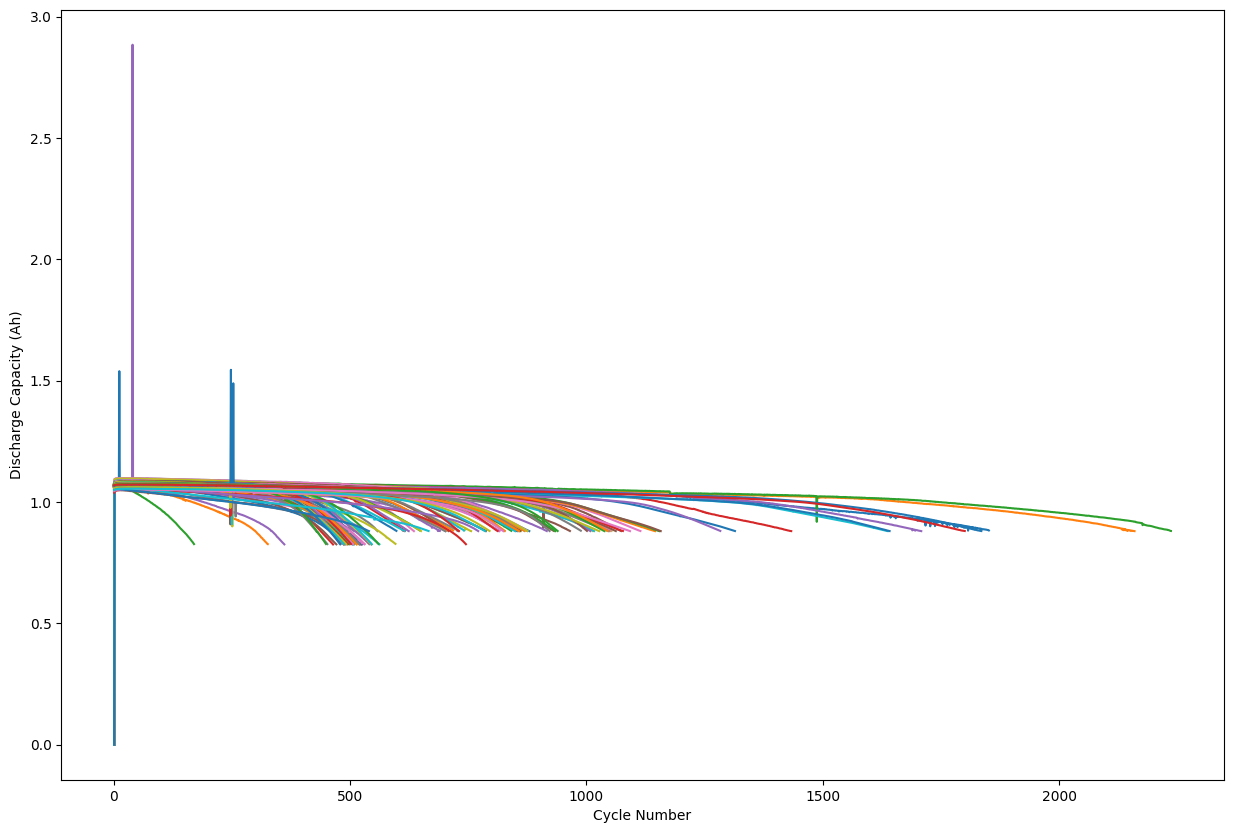

In [8]:
plt.figure(figsize=(15,10))
for i in bat_dict.keys():
    plt.plot(bat_dict[i]['summary']['cycle'], bat_dict[i]['summary']['QD'])
plt.xlabel('Cycle Number')
plt.ylabel('Discharge Capacity (Ah)')

In [9]:
test_ind = np.hstack((np.arange(0,(numBat1+numBat2),2),83))
train_ind = np.arange(1,(numBat1+numBat2-1),2)
secondary_test_ind = np.arange(numBat-numBat3,numBat)

In [10]:
"""
************************************************************************************************
************************************************************************************************

Below this point, his notebook is adapted from

https://github.com/rochan17/Battery-Life-Prediction

which tries to reproduce results from Severson, et al. 
    
************************************************************************************************
************************************************************************************************
"""

'\n************************************************************************************************\n************************************************************************************************\n\nBelow this point, his notebook is adapted from\n\nhttps://github.com/rochan17/Battery-Life-Prediction\n\nwhich tries to reproduce results from Severson, et al. \n    \n************************************************************************************************\n************************************************************************************************\n'

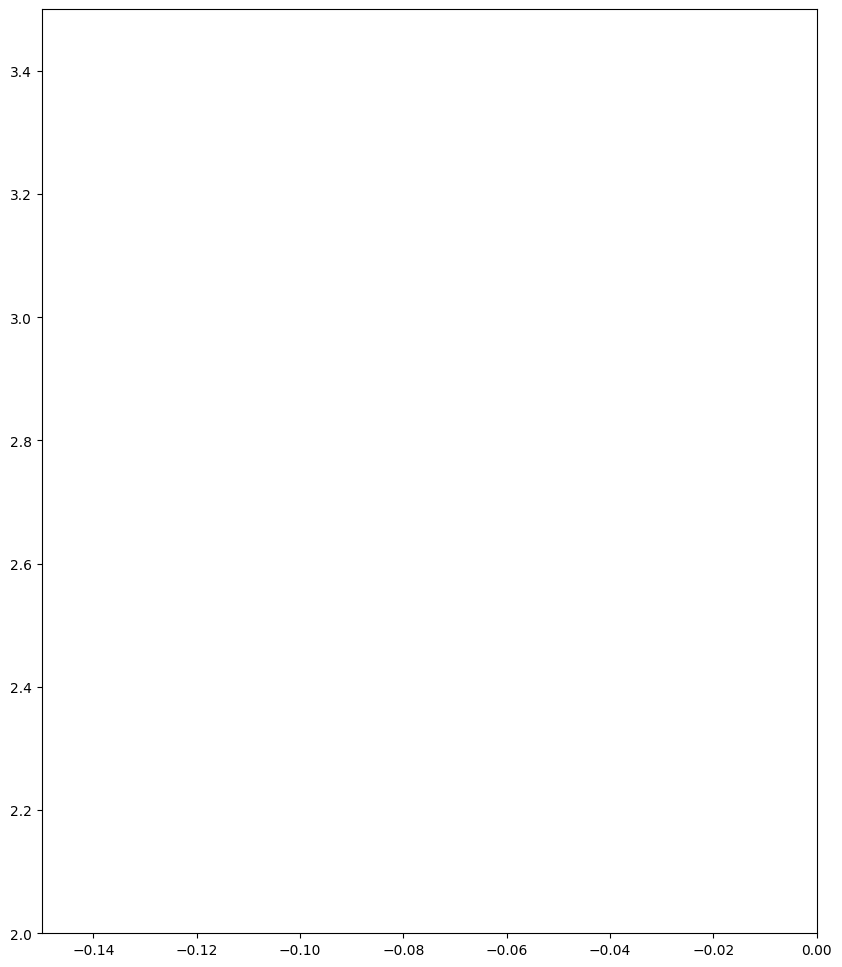

In [19]:
plt.figure(figsize=(10,12))
plt.xlim(-0.15,0)
plt.ylim(2,3.5)

minimum_dQ_100_10 = np.zeros(len(bat_dict.keys()))
variance_dQ_100_10 = np.zeros(len(bat_dict.keys()))
skewness_dQ_100_10 = np.zeros(len(bat_dict.keys()))
kurtosis_dQ_100_10 = np.zeros(len(bat_dict.keys()))

for i, cell in enumerate(bat_dict.values()):
    c10 = cell['cycles']['10']
    c100 = cell['cycles']['100']
    dQ_100_10 = c100['Qdlin'] - c10['Qdlin']
    
    minimum_dQ_100_10[i] = np.log10(np.abs(np.min(dQ_100_10)))
    variance_dQ_100_10[i] = np.log10(np.var(dQ_100_10))
    skewness_dQ_100_10[i] = np.log10(np.abs(skew(dQ_100_10)))
    kurtosis_dQ_100_10[i] = np.log10(np.abs(kurtosis(dQ_100_10)))

In [20]:
dataset=pd.DataFrame()

In [21]:
dataset['cell']=bat_dict.keys()

In [22]:
cl=[]
for i in bat_dict.keys():
    cl.append(bat_dict[i]['cycle_life'][0][0])
dataset['cell_life']=cl

In [23]:
dataset['minimum_dQ_100_10']=minimum_dQ_100_10
dataset['variance_dQ_100_10']=variance_dQ_100_10 
dataset['skewness_dQ_100_10']=skewness_dQ_100_10 
dataset['kurtosis_dQ_100_10']=kurtosis_dQ_100_10 

In [24]:
dataset.head()

,cell,cell_life,minimum_dQ_100_10,variance_dQ_100_10,skewness_dQ_100_10,kurtosis_dQ_100_10
0,b1c0,1852.0,-2.050261,-5.051527,-0.138643,-0.040960
1,b1c1,2160.0,-2.045150,-5.135776,-0.499000,0.016426
2,b1c2,2237.0,-1.986994,-4.951883,-0.359039,0.069572
3,b1c3,1434.0,-1.703321,-4.386348,-0.322093,0.050851
4,b1c4,1709.0,-1.837397,-4.604779,-0.456945,0.133910


In [25]:
dataset.corr()

C:\Users\James\AppData\Local\Temp\ipykernel_22412\2191645083.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset.corr()


,cell_life,minimum_dQ_100_10,variance_dQ_100_10,skewness_dQ_100_10,kurtosis_dQ_100_10
cell_life,1.000000,-0.870445,-0.894116,0.260907,0.020858
minimum_dQ_100_10,-0.870445,1.000000,0.944222,-0.223964,0.031465
variance_dQ_100_10,-0.894116,0.944222,1.000000,-0.241558,-0.044651
skewness_dQ_100_10,0.260907,-0.223964,-0.241558,1.000000,-0.052942
kurtosis_dQ_100_10,0.020858,0.031465,-0.044651,-0.052942,1.000000


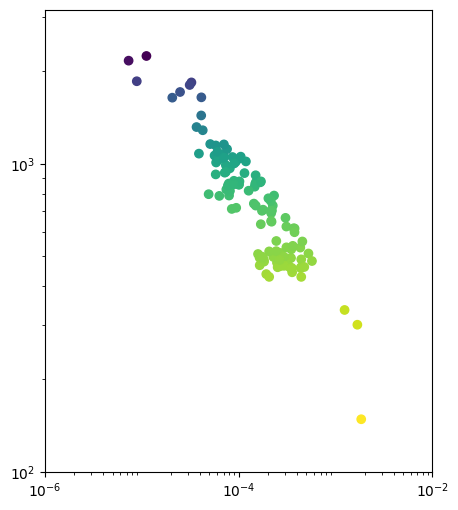

In [26]:
plt.figure(figsize=(5,6))
plt.ylim(pow(10,2),pow(10,3.5))
plt.xlim(pow(10,-6),pow(10,-2))
plt.yscale(value='log')
plt.xscale(value='log')
plt.xticks(np.power(10,np.linspace(-6,-2,3)))
plt.scatter(x=10**(dataset['variance_dQ_100_10']),y=dataset['cell_life'],cmap='viridis_r',c=dataset['cell_life'])

In [27]:
from sklearn.linear_model import LinearRegression

Slope_Cap_Fade_2_100=np.zeros(len(bat_dict.keys()))
Intercept_Cap_Fade_2_100=np.zeros(len(bat_dict.keys()))
Discharge_Cap_2=np.zeros(len(bat_dict.keys()))
Diff_MaxCap_DC2=np.zeros(len(bat_dict.keys()))
#Discharge Capacity Fade Curve Features
for i, cell in enumerate(bat_dict.values()):
    cap=cell['summary']['QD'][1:100].reshape(-1,1)
    cycle=cell['summary']['cycle'][1:100].reshape(-1,1)
    regressor=LinearRegression()
    regressor.fit(cycle,cap)
    
    Slope_Cap_Fade_2_100[i]=regressor.coef_[0]
    Intercept_Cap_Fade_2_100[i]=regressor.intercept_
    Discharge_Cap_2[i]=cap[1][0]
    Diff_MaxCap_DC2[i]=np.max(cap)-cap[1][0]
    
dataset['Slope_Cap_Fade_2_100']=Slope_Cap_Fade_2_100
dataset['Intercept_Cap_Fade_2_100']=Intercept_Cap_Fade_2_100
dataset['Discharge_Cap_2']=Discharge_Cap_2
dataset['Diff_MaxCap_DC2']=Diff_MaxCap_DC2

In [28]:
#Other features
Avg_charge_time=np.zeros(len(bat_dict.keys()))
Temp_Integ_2_100=np.zeros(len(bat_dict.keys()))
Min_IR=np.zeros(len(bat_dict.keys()))
Diff_IR_2_100=np.zeros(len(bat_dict.keys()))

for i, cell in enumerate(bat_dict.values()):
    avg_time=np.mean(cell['summary']['chargetime'][1:6])
    a=cell['summary']['chargetime'][1:100]
    b=cell['summary']['Tavg'][1:100]
    integral=np.sum(np.multiply(a,b))
    array=cell['summary']['IR'][1:100]
    IR_min=min(array[array!=0])
    IR_diff=cell['summary']['IR'][99]-cell['summary']['IR'][1]
    
    Avg_charge_time[i]=avg_time
    Temp_Integ_2_100[i]=integral
    Min_IR[i]=IR_min
    Diff_IR_2_100[i]=IR_diff

dataset['Avg_charge_time']=Avg_charge_time
dataset['Temp_Integ_2_100']=Temp_Integ_2_100
dataset['Min_IR']=Min_IR
dataset['Diff_IR_2_100']=Diff_IR_2_100 

In [29]:
from scipy.stats import zscore
abs(zscore(dataset['kurtosis_dQ_100_10']))>2

0      False
1      False
2      False
3      False
4      False
       ...  
119    False
120     True
121     True
122    False
123    False
Name: kurtosis_dQ_100_10, Length: 124, dtype: bool

In [30]:
dataset

,cell,cell_life,minimum_dQ_100_10,variance_dQ_100_10,skewness_dQ_100_10,kurtosis_dQ_100_10,Slope_Cap_Fade_2_100,Intercept_Cap_Fade_2_100,Discharge_Cap_2,Diff_MaxCap_DC2,Avg_charge_time,Temp_Integ_2_100,Min_IR,Diff_IR_2_100
0,b1c0,1852.0,-2.050261,-5.051527,-0.138643,-0.040960,-2.068070e-04,1.091144,1.071900,0.467154,13.374894,41876.171150,0.016444,-0.000075
1,b1c1,2160.0,-2.045150,-5.135776,-0.499000,0.016426,5.535293e-06,1.080965,1.076612,0.007977,13.409150,41484.509937,0.016764,-0.000042
2,b1c2,2237.0,-1.986994,-4.951883,-0.359039,0.069572,1.029563e-05,1.084846,1.081315,0.006738,13.358242,41694.991899,0.016613,-0.000014
3,b1c3,1434.0,-1.703321,-4.386348,-0.322093,0.050851,1.713635e-05,1.084075,1.081228,0.005025,12.025140,35729.237342,0.016098,0.000039
4,b1c4,1709.0,-1.837397,-4.604779,-0.456945,0.133910,1.899432e-05,1.081875,1.079012,0.005304,12.041851,37527.249169,0.016369,-0.000053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,b3c41,786.0,-1.608813,-4.199350,-0.511520,0.040280,9.732245e-06,1.053878,1.051434,0.003450,10.042974,33447.610799,0.017007,-0.000173
120,b3c42,1642.0,-2.233379,-4.384951,0.281782,0.437447,1.810489e-06,1.069428,1.067686,0.002303,11.038937,36099.127665,0.015754,-0.000562
121,b3c43,1046.0,-1.699730,-4.152156,-0.477362,-0.283129,3.041014e-06,1.072729,1.070812,0.002522,10.043888,33702.801503,0.015550,-0.000145
122,b3c44,940.0,-1.584652,-4.133081,-0.665259,0.090173,4.689737e-06,1.073078,1.070332,0.003573,10.043436,33160.813144,0.015517,-0.000106


In [31]:
x=bat_dict['b1c18']['summary']['QD'][1::]
l=x[x!=x.max()].max()-x[0]
print(l)
dataset['Diff_MaxCap_DC2'].values[14]=l

0.003975300000000015


In [32]:
x=bat_dict['b1c0']['summary']['QD'][1::]
l=x[x!=x.max()].max()-x[0]
print(l)
dataset['Diff_MaxCap_DC2'].values[0]=l

0.00639320000000021


In [33]:
dataset.iloc[:,9:10]

,Diff_MaxCap_DC2
0,0.006393
1,0.007977
2,0.006738
3,0.005025
4,0.005304
...,...
119,0.003450
120,0.002303
121,0.002522
122,0.003573


In [34]:
mx=dataset['minimum_dQ_100_10'].mean()
dataset['minimum_dQ_100_10'].values[36]=mx

In [35]:
xm=dataset['skewness_dQ_100_10'].mean()
dataset['skewness_dQ_100_10'].values[120]=xm

In [36]:
dataset

,cell,cell_life,minimum_dQ_100_10,variance_dQ_100_10,skewness_dQ_100_10,kurtosis_dQ_100_10,Slope_Cap_Fade_2_100,Intercept_Cap_Fade_2_100,Discharge_Cap_2,Diff_MaxCap_DC2,Avg_charge_time,Temp_Integ_2_100,Min_IR,Diff_IR_2_100
0,b1c0,1852.0,-2.050261,-5.051527,-0.138643,-0.040960,-2.068070e-04,1.091144,1.071900,0.006393,13.374894,41876.171150,0.016444,-0.000075
1,b1c1,2160.0,-2.045150,-5.135776,-0.499000,0.016426,5.535293e-06,1.080965,1.076612,0.007977,13.409150,41484.509937,0.016764,-0.000042
2,b1c2,2237.0,-1.986994,-4.951883,-0.359039,0.069572,1.029563e-05,1.084846,1.081315,0.006738,13.358242,41694.991899,0.016613,-0.000014
3,b1c3,1434.0,-1.703321,-4.386348,-0.322093,0.050851,1.713635e-05,1.084075,1.081228,0.005025,12.025140,35729.237342,0.016098,0.000039
4,b1c4,1709.0,-1.837397,-4.604779,-0.456945,0.133910,1.899432e-05,1.081875,1.079012,0.005304,12.041851,37527.249169,0.016369,-0.000053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,b3c41,786.0,-1.608813,-4.199350,-0.511520,0.040280,9.732245e-06,1.053878,1.051434,0.003450,10.042974,33447.610799,0.017007,-0.000173
120,b3c42,1642.0,-2.233379,-4.384951,-0.781039,0.437447,1.810489e-06,1.069428,1.067686,0.002303,11.038937,36099.127665,0.015754,-0.000562
121,b3c43,1046.0,-1.699730,-4.152156,-0.477362,-0.283129,3.041014e-06,1.072729,1.070812,0.002522,10.043888,33702.801503,0.015550,-0.000145
122,b3c44,940.0,-1.584652,-4.133081,-0.665259,0.090173,4.689737e-06,1.073078,1.070332,0.003573,10.043436,33160.813144,0.015517,-0.000106


In [37]:
dataset.to_csv('final_dataset2.csv',na_rep='Unknown',float_format='%.6f',index=False)